# "FAKE NEWS DETECTION"

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import string  
import re     
from gensim.models import Word2Vec   
from sklearn import cluster  
from sklearn import metrics  
from sklearn.decomposition import PCA  
from sklearn.manifold import TSNE  
import gensim, pprint
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import strip_tags 
from gensim.parsing.preprocessing import strip_punctuation
from gensim.parsing.preprocessing import strip_multiple_whitespaces 
from gensim.parsing.preprocessing import strip_numeric
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_short
from gensim.models.phrases import Phrases
from gensim.parsing.preprocessing import stem_text
from gensim import utils

**READING THE DATASETS:**

In [2]:
fake=pd.read_csv(r"C:\\Users\\win 7\\Desktop\\Datascience\\Fake News\\Fake-News-Project--1-\\Fake News Project\\Fake.csv")
true=pd.read_csv(r"C:\Users\win 7\Desktop\Datascience\Fake News\Fake-News-Project--1-\Fake News Project\\True.csv")

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [5]:
fake.sample(3)

,title,text,subject,date
5120,Trump Has A Fantastic ‘New’ Plan To Win Back ...,Donald Trump is hemorrhaging Republican suppor...,News,"August 9, 2016"
1526,Betsy DeVos TOTALLY HUMILIATED During Keynote...,U.S. Secretary of Education Betsy DeVos tried ...,News,"May 10, 2017"
18220,EMPLOYEES IMPLANTED WITH MICROCHIP at “Chip Pa...,We reported last week on the Wisconsin company...,left-news,"Aug 1, 2017"


In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [8]:
true.sample(3)

,title,text,subject,date
17527,U.S. House Republican McCarthy wants to fix Ir...,WASHINGTON (Reuters) - The No. 2 U.S. House of...,worldnews,"October 13, 2017"
14875,Iran 'hopes Hariri will remain Lebanon's prime...,LONDON (Reuters) - An Iranian official said on...,worldnews,"November 14, 2017"
11328,Russia's Lavrov: main part of battle with Isla...,MOSCOW (Reuters) - Russian Foreign Minister Se...,worldnews,"December 27, 2017"


In [9]:
print("Shape of  fake is {} is".format(fake.shape))
print("Shape of  true is {} is".format(true.shape))

Shape of  fake is (23481, 4) is
Shape of  true is (21417, 4) is


In [10]:
true.describe(include = 'O')

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [11]:
fake.describe(include = 'O')

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [12]:
print(fake.info())
print("**************")
print(true.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None
**************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


**FIND THE NULL VALUES:**

In [13]:
print(fake.isnull().sum()) 
print('************') 
print(true.isnull().sum()) 

title      0
text       0
subject    0
date       0
dtype: int64
************
title      0
text       0
subject    0
date       0
dtype: int64


**FILL THE NULL VALUES:**

In [14]:
true=true.fillna(' ')
fake=fake.fillna(' ')

**REMOVE UNNECESSARY DATA:**

In [15]:
cleansed_data = []
for data in true.text:
    if "@realDonaldTrump : - " in data:
        cleansed_data.append(data.split("@realDonaldTrump : - ")[1])
    elif "(Reuters) -" in data:
        cleansed_data.append(data.split("(Reuters) - ")[1])
    else:
        cleansed_data.append(data)
    
true["text"] = cleansed_data
true.head(10)    

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...",The White House said on Friday it was set to k...,politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...",President Donald Trump said on Thursday he bel...,politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,While the Fake News loves to talk about my so-...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,"Together, we are MAKING AMERICA GREAT AGAIN! b...",politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,Alabama Secretary of State John Merrill said h...,politicsNews,"December 28, 2017"


**CLUB TEXT AND TITLE:**

In [16]:
fake['Sentences'] = fake['title'] + ' ' + fake['text'] 
true['Sentences'] = true['title'] + ' ' + true['text'] 

**ASSIGN LABELS FOR THE TEXT:**

In [17]:
fake['Label'] = 0 
true['Label'] = 1 

**CONCATINATING TWO DATASETS:**

In [18]:
final_data = pd.concat([fake, true])
final_data = final_data.sample(frac=1).reset_index(drop=True) 
final_data = final_data.drop(['title', 'text', 'subject', 'date'], axis = 1) 

**CATEGORIZING WORDS TO REAL AND FAKE:**

In [19]:
real_words = ''
fake_words = ''
for val in final_data[final_data['Label']==1].Sentences:
   # split the value
   tokens = val.split()
   # Converts each token into lowercase
   for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
real_words += " ".join(tokens)+" " 
for val in final_data[final_data['Label']==0].Sentences:
   # split the value
    tokens = val.split()
   # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    fake_words += " ".join(tokens)+" "    

**VISUALIZE REAL WORDS:**

In [20]:
from wordcloud import WordCloud, STOPWORDS   
from nltk.corpus import stopwords
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(real_words)


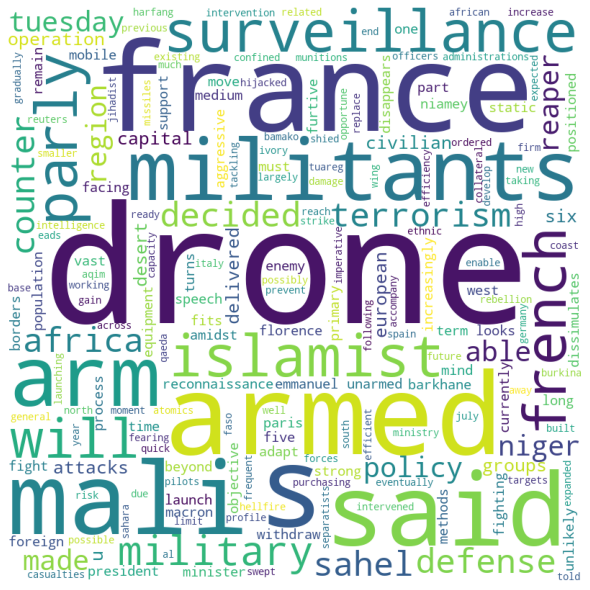

In [21]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)   
plt.axis("off")  
plt.tight_layout(pad = 0)
plt.show() 

**VISUALIZE FAKE WORDS:**

In [22]:
wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(fake_words)  

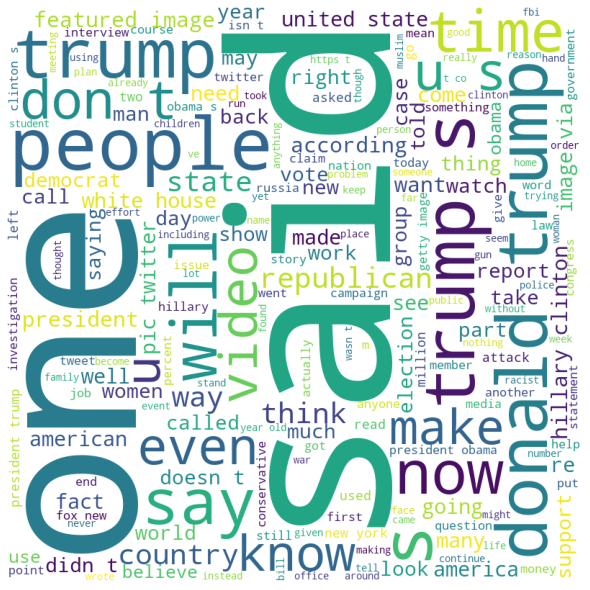

In [23]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show() 

**PRE PROCESSING THE TEXT:**

In [24]:
#To remove urls
def remove_URL(s):
   regex = re.compile(r'https?://\S+|www\.\S+|bit\.ly\S+')
   return regex.sub(r'',s)
CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, remove_URL, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short]  
processed_data = [] 
processed_labels = [] 
for index, row in final_data.iterrows():
    words_broken_up = preprocess_string(row['Sentences'], CUSTOM_FILTERS)
    if len(words_broken_up) > 0:
        processed_data.append(words_broken_up) 
        processed_labels.append(row['Label'])
print(len(processed_data))

44889


**CALCULATING THE DIVISION POINT:**

In [25]:
import math
#for training 80 percent of data is used 
trainlen=math.ceil((4*len(processed_data))/5)
print(trainlen)   
#for testing 20 percent of data is used 
testlen=len(processed_data)-trainlen
print(testlen)   

35912
8977


**DIVIDING THE DATASETS:**

In [26]:
train=processed_data[:trainlen]
test=processed_data[trainlen:]
out=final_data.Sentences[trainlen:]
print(len(test))
print(out[44889])
print(test[0]) 

8977
Trump's appeal for poll monitors draws tepid response from some supporters While Donald Trump often rails against a “rigged” election on Twitter and at rallies nationwide, he goes a few steps further in Pennsylvania, a state crucial to the Republican’s fading chances to win the White House. Here, he has made direct appeals since August to recruit voters as poll monitors on Election Day and has pointed specifically at Philadelphia as a city beset by voter fraud. Despite offering little evidence for any of his claims, his “rigged” election message is resonating with his followers in this traditional battleground state where Democratic rival Hillary Clinton has opened up a wide lead. But his calls for poll watchers on Nov. 8 is drawing a mix of confusion, concern and tepid support. In some cases, Trump’s talk of fraud appears to have made some of his own followers more resigned to an election loss, even though independent studies show U.S. voting chicanery is exceptionally rare and c

In [27]:
type(train)

list

**BUILDING A AWORD2VEC MODEL:**

In [28]:
# Word2Vec model trained on processed data  
model = Word2Vec(train, min_count=1) 

**FINDING THE SENTENCE VECTOR:**

In [29]:
def ReturnVector(x):
    try:
            return model1[x]
    except:   
            return np.zeros(100)
def Sentence_Vector(sentence):
        word_vectors = list(map(lambda x: ReturnVector(x), sentence))
        return np.average(word_vectors, axis=0).tolist()
X = []  
for data_x in test: 
        # print(data_x)
        X.append(Sentence_Vector(data_x))
print(test[0]) 
X_np = np.array(X) 
X_np.shape

['president', 'obama', 'calls', 'fox', 'news', 'creating', '“fictional”', 'obama', 'people', 'hate', 'fox', 'news', 'worked', 'years', 'vilify', 'president', 'obama', 'way', 'obama', 'calling', 'zero', 'cks', 'left', 'interview', 'atlantic', 'president', 'obama', 'talked', 'nehisi', 'coates', 'right', 'wing', 'media', 'invented', 'fictional', 'version', 'purpose', 'scaring', 'enraging', 'white', 'people', 'subjected', 'kind', 'concentrated', 'vilification', 'fox', 'news', 'rush', 'limbaugh', 'conservative', 'media', 'ecosystem', 'consequence', 'years', 'senator', 'polling', 'percent', 'obama', 'said', 'weren', 'seeing', 'image', 'trying', 'away', 'stuff', 'black', 'people', 'coddle', 'criminals', 'stereotypes', 'african', 'american', 'politicians', 'liberal', 'politicians', 'started', 'kind', 'prism', 'established', 'end', 'race', 'particularly', 'sarah', 'palin', 'nominee', 'obviously', 'immediately', 'elected', 'deployed', 'force', 'impact', 'terms', 'large', 'portion', 'white', 'vot

(8977, 100)

**K MEANS ON TEST DATASET:**

In [30]:
kmeans = cluster.KMeans(n_clusters=2, verbose=0)  
clustered = kmeans.fit_predict(X_np) 

E:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


# **PREDICTING THE OUTPUT:**

In [31]:
testing_df = {'Sentences': test, 'Labels': processed_labels[:8977], 'Pre diction':clustered}
testing_df = pd.DataFrame(data=testing_df)
testing_df.head(10)

,Sentences,Labels,Pre diction
0,"[president, obama, calls, fox, news, creating,...",0,0
1,"[wow, hillary, supporter, caught, undercover, ...",0,0
2,"[scenes, bank, lobbyists, temper, expectations...",1,0
3,"[seriously, pro, illegal, alien, supporters, d...",0,0
4,"[breaking, dnc, staffers, sold, sensitive, inf...",1,0
5,"[chris, rock, perfectly, roasts, lily, white, ...",1,0
6,"[deputy, governor, afghan, province, kidnapped...",0,0
7,"[house, democrats, press, trump, release, tax,...",0,0
8,"[khamenei, says, iran, shred, nuclear, deal, q...",1,0
9,"[trump, says, makes, mistakes, immediately, ma...",1,0


**COMPARING ORIGINAL TO PREDICTED OUTCOMES:**

In [32]:
trueneg=truepos=falseneg=falsepos=0 
for index, row in testing_df.iterrows():
    if row['Labels'] == row['Pre diction']==0:
        trueneg+=1
        if row['Labels'] == row['Pre diction']==1:
            truepos+=1
        if row['Labels'] ==1 and row['Pre diction']==0:
            falseneg+=1
        if row['Labels'] ==0 and row['Pre diction']==1:
            falsepos+=1
print("Correctly clustered news: " + str(((truepos+trueneg)*100)/(trueneg+truepos+falseneg+falsepos)) + "%") 

Correctly clustered news: 100.0%


# $CONCLUSION:$

# **we are predicting whether an article is a real or fake article based on the relationship between the words . We have used the 2017 US president election datasets for creation of this system . We used Word2Vec model for building model and K -Means for the prediction and obtained an accuracy of 87%.**